## Context
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

## Data Description

Variable  ||	Definition
#### id:
Unique ID for the customer
#### Gender:
Gender of the customer
#### Age:
Age of the customer
#### Driving_License:
0 : Customer does not have DL, 1 : Customer already has DL
#### Region_Code:
Unique code for the region of the customer
#### Previously_Insured:
1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
#### Vehicle_Age:
Age of the Vehicle
#### Vehicle_Damage:
1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
#### Annual_Premium:
The amount customer needs to pay as premium in the year
#### PolicySalesChannel:
Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
#### Vintage:
Number of Days, Customer has been associated with the company
#### Response:
1 : Customer is interested, 0 : Customer is not interested

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

In [2]:
main_data = pd.read_csv(r'C:\Users\Vatsal\Python Projects\Datasets\Health Insurance Cross Sell Prediction.csv')
## Importing dataset from machine

In [3]:
print(main_data.shape)
main_data.columns
## Printing the shape (Rows , Columns) of main_data
## Checking all the columns present in main_data

(381109, 12)


Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [4]:
df = pd.DataFrame(main_data)
print(df.shape)
df.head()
## Creating a copy of the main dataset (main_data) and naming it as df 

(381109, 12)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.describe()
## Describing important statistical values from the dataset (df)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [6]:
df.apply(lambda df:len(df.unique()))
## Identifying unique values in each variable from the dataset (df)

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [7]:
print('Gender: ', df['Gender'].value_counts().all)
print()
print('Driving License: ', df['Driving_License'].value_counts().count)
print()
print('Previously Insured: ', df['Previously_Insured'].value_counts().all)
print()
print('Vehicle Age: ', df['Vehicle_Age'].value_counts().all)
print()
print('Vehicle Damage: ', df['Vehicle_Damage'].value_counts().all)
print()
print('Response: ', df['Response'].value_counts().all)

## Total count of entries for each unique values for each variable

Gender:  <bound method Series.all of Male      206089
Female    175020
Name: Gender, dtype: int64>

Driving License:  <bound method Series.count of 1    380297
0       812
Name: Driving_License, dtype: int64>

Previously Insured:  <bound method Series.all of 0    206481
1    174628
Name: Previously_Insured, dtype: int64>

Vehicle Age:  <bound method Series.all of 1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64>

Vehicle Damage:  <bound method Series.all of Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64>

Response:  <bound method Series.all of 0    334399
1     46710
Name: Response, dtype: int64>


Result: Vales for each variable from above code:
1. Gender: Male = 2,06,089 | Female = 1,75,020
2. Driving_License: Have License = 3,80,297 | Don't have License = 812
3. Previously_Insured: Didn't have insurance = 2,06,481 | Previously had insurance = 1,74,628
4. Vehicle_Age: 1-2 = 2,00,316 | <1 = 1,64,786 | >2 = 16,007
5. Vehicle_Damage: Yes = 1,92,413 | No = 1,88,696
6. Response: Not interested = 3,34,399 | Interested = 46,710

In [8]:
## Alternate method for above code
category_cols = df.select_dtypes(include=['object','int64','float64'])
for col in category_cols:
    frequency = df[col].value_counts()
    print('\nThe frequency distribution for ' + col + ':')
    print(frequency)
    
## Number of times each value appears in the column


The frequency distribution for id:
2047      1
295621    1
84604     1
82557     1
88702     1
         ..
107934    1
109983    1
21920     1
23969     1
2049      1
Name: id, Length: 381109, dtype: int64

The frequency distribution for Gender:
Male      206089
Female    175020
Name: Gender, dtype: int64

The frequency distribution for Age:
24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64

The frequency distribution for Driving_License:
1    380297
0       812
Name: Driving_License, dtype: int64

The frequency distribution for Region_Code:
28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.

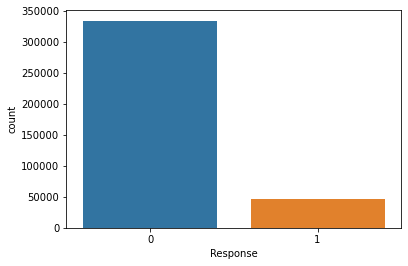

In [9]:
sns.countplot(df.Response)

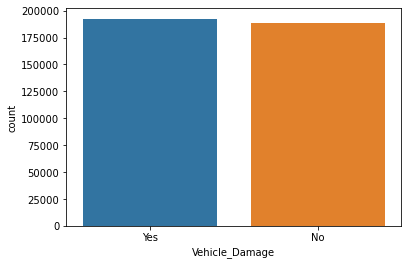

In [10]:
sns.countplot(df.Vehicle_Damage)

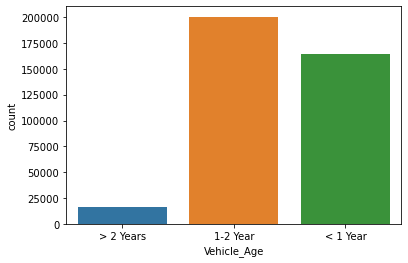

In [11]:
sns.countplot(df.Vehicle_Age)

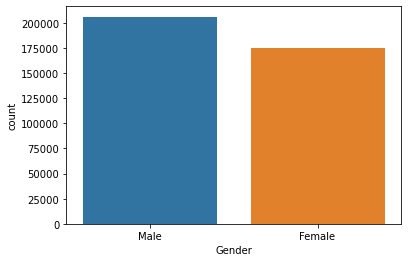

In [12]:
sns.countplot(df.Gender)

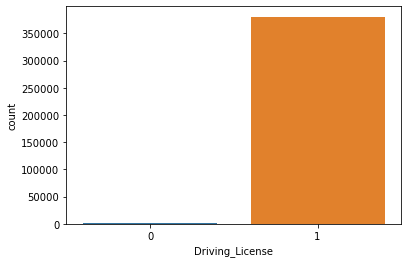

In [13]:
sns.countplot(df.Driving_License)

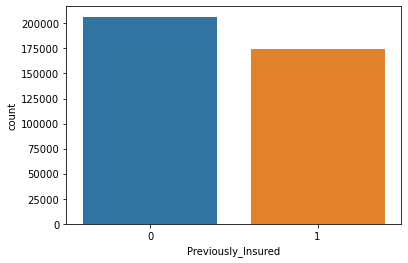

In [14]:
sns.countplot(df.Previously_Insured)

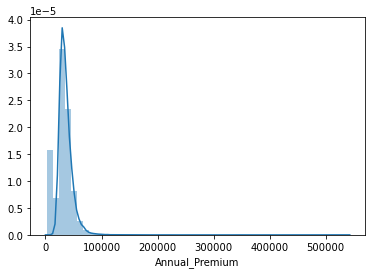

In [15]:
sns.distplot(df.Annual_Premium)

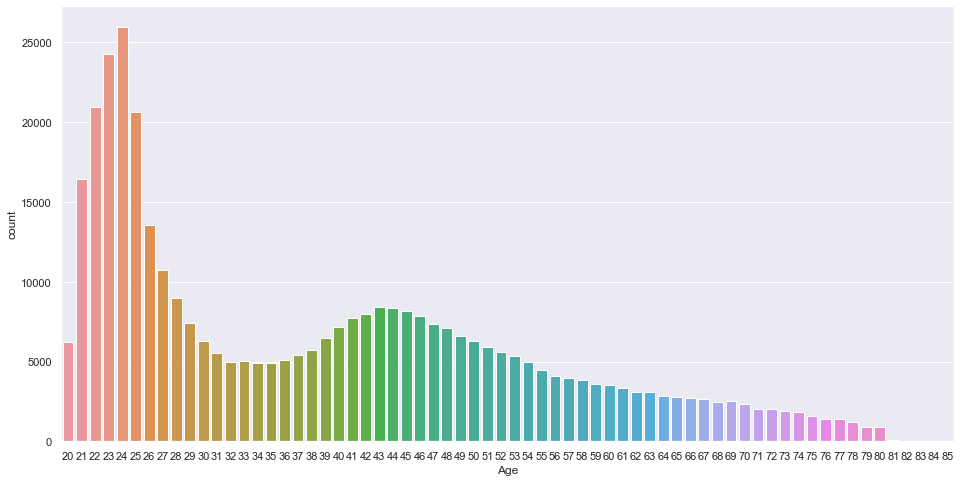

In [16]:
sns.set(rc={'figure.figsize':(16,8)})
sns.countplot(df.Age)

In [17]:
df.isnull().sum()
## Checking for all the missing values from the dataset (df)

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [18]:
df.corr()
## Checking the correlation of each varible to another

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


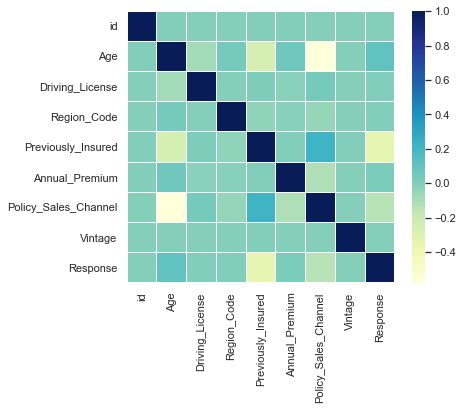

In [19]:
corrmat = df.corr()

f, ax = plt.subplots(figsize =(6, 5)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

## Checking for correlation and plotting it on a heatmap

From the above:
1. The shape of the dataset is 3,81,109 rows and 12 columns
2. Data description:
    1. Age: Mean age group is 36-39 years
    2. Driving_License: Everyone insured has a driving license
    3. Annual_Premium: Mean annual premium is Rs. 30,564/-
    4. Vintage: Mean number of days the customer has been associated with the company is 154 days
3. Visualization description:
    1. Response: More customers are not interested in Vehicle insurance
    2. Vehicle_Damage: Nearly 50% of customers got their vehicles damaged in past
    3. Vehicle_Age: Most of the vehicles are between the age of 1-2 years, followed by age less than a year, and very few vehicles with age more than 2 years
    4. Gender: Nearly 55-60% of the customers are males
    5. Driving_License: Almost everyone has a valid driving license
    6. Previously_Insured: Nearly 55-60% customers don't have a vehicle insurance
    7. Annual_Premium: Majority of the customers fall under 3,000 - 10,000 bracket
    8. Age: Majority of the age group comes between 21-27 years of age
4. There are no missing values in this dataset
5. The data in this dataset are not positively or negatively correlated to one another
   i.e, there is no significant correlation in this dataset

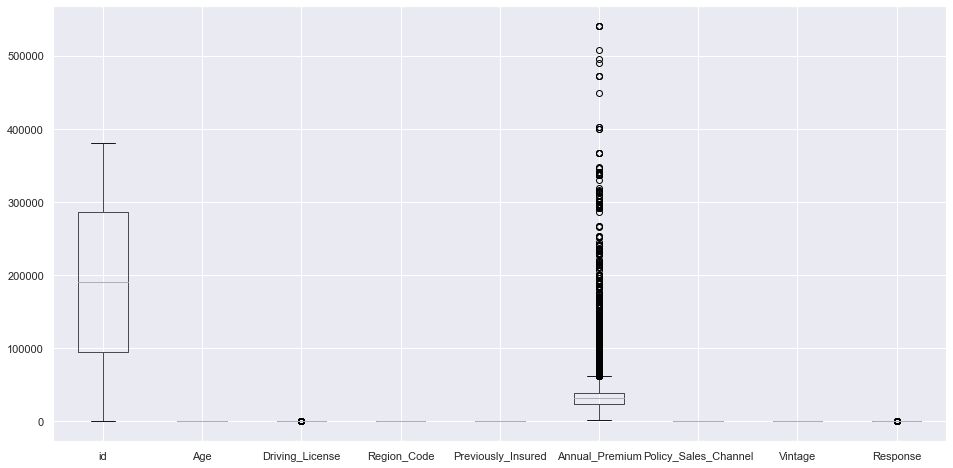

In [20]:
df.boxplot()
## Create Boxplot to check for outliers in the entire dataset (df)

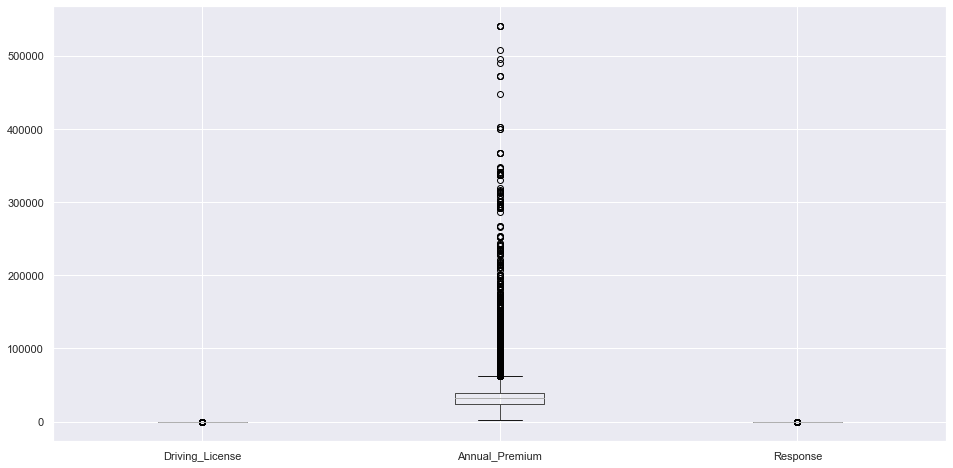

In [21]:
df.boxplot(['Driving_License','Annual_Premium', 'Response'])
## Creating Boxplot to check closely for outliers from the three variables where we found outliers

In [22]:
q1 = df.quantile(0.25) #first quartile value
q2 = df.quantile(0.50) #second quartile value
q3 = df.quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

high_low = pd.concat([high, low, q2], join = 'outer', axis = 1)
print(tabulate(high_low, headers=['Index', 'High', 'Low' , 'Median'], tablefmt='presto'))

## Finding the IQR for the given data, this helps in understanding for treatment of outliers

 Index                |     High |       Low |   Median
----------------------+----------+-----------+----------
 id                   | 571663   | -190553   |   190555
 Age                  |     85   |     -11   |       36
 Driving_License      |      1   |       1   |        1
 Region_Code          |     65   |     -15   |       28
 Previously_Insured   |      2.5 |      -1.5 |        0
 Annual_Premium       |  61892.5 |    1912.5 |    31669
 Policy_Sales_Channel |    336.5 |    -155.5 |      133
 Vintage              |    444.5 |    -135.5 |      154
 Response             |      0   |       0   |        0


However, in this case, we will not treat the outliers because:
1. Driving_License: The only values in this variable are 0 and 1 - so if we alter the values to fit in the boxplot, the model may not be accurate due to manipulated information
2. Annual_Premuim: Annual premium cannot stay the same for every customer, because as and when the premium increases the value for cover of the insurance increases and vice versa, therefore for higher insurance cover the customer will be paying a higher premium and if we alter the values for this variable for it to fit in the boxplot, the final output of the model will be affected as the data will now have highly manipulated values/ information
3. Response: The only values in this variable are 0 and 1 - and also because this is the target variable, thereby any manipulation of data in this variable will lead to poor model result

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002814D2C88B0>,
      dtype=object)

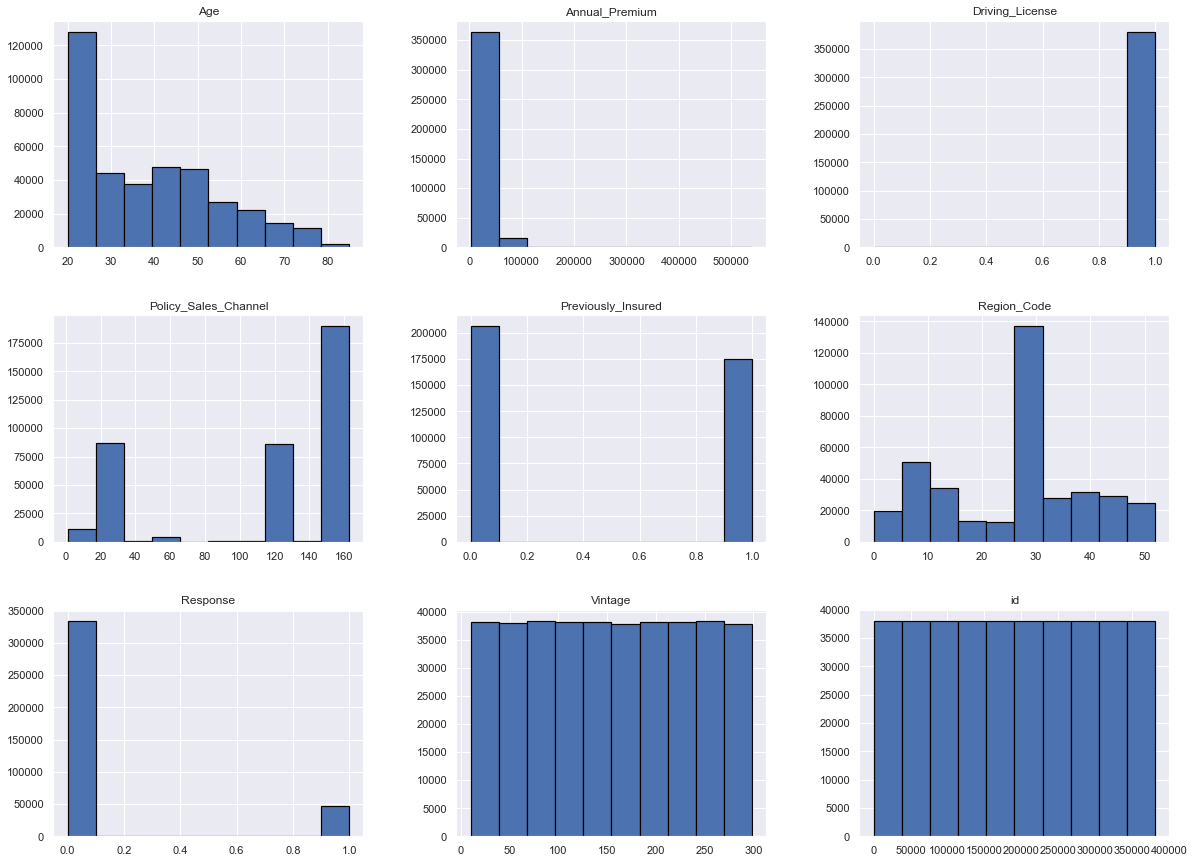

In [23]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(20,15))
## Histogram to understand the distribution of data for numeric variables

From the above histogram:
1. Age: Majority of data distribution is seen amongst the age group of 20-30 years
2. Policy_Sales_Channel: Majority of the data distribution is seen in the following three Channel code frequency bin:
    1. Code frequency 160
    2. Code frequency 20
    3. Code frequency 120
3. Region_Code: The data is nearly equally distributed among all codes except for Code frequency bin 30 where maximum data distribution is observed
4. Vintage: Data seems to be nearly equally distributed among all frequency bins

In [24]:
colname =[]
for j in df.columns[:]:
    if df[j].dtype == 'object':
        colname.append(j)
print(colname)

## Listing down all object data type variables from dataset (df)

['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [25]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

for j in colname:
    df[j] = le.fit_transform(df[j].astype(str))
    
## Preprocessing data by converting object data type into numerical values for splitting it to X and Y

In [26]:
df.head()

## Verifying if the preprocessing is conducted successfully

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [27]:
X = df.values[:,:-1]
Y = df.values[:,-1]
Y = Y.astype(int)

## Splitting data in X and Y for splitting the X and Y data into train and test

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)
#print(X)

## Using StandardScaler to transform the X values between -1 and 1

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 25)

## Converting X and Y data into X_train, X_test and Y_train, Y_test for model building

### Logistic Regression - 1

In [30]:
#Building the model
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression() # creating the model object
#Fitting the training data in the model
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

print(classifier.coef_)
print(classifier.intercept_)

[[-6.55226816e-05  6.26875014e-02 -9.41788433e-02  6.56767689e-02
  -7.55854062e-03 -2.00756385e+00 -1.01675450e-01  1.06017615e+00
   3.17408178e-02 -1.96645468e-01 -1.25200036e-03]]
[-4.0520732]


In [31]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:",acc)

[[100279      1]
 [ 14053      0]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100280
           1       0.00      0.00      0.00     14053

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333

Accuracy of the model: 0.8770783588290345


#### From the Logistic Regression - 1 model:
1. Accuracy: 87.70% 
2. Precision: How many items selected are relevant?
    1. Class 0 = 88%
    2. Class 1 = Nill
3. Recall: How many relevant items were selected?
    1. Class 0 = 100%
    2. Class 1 = Nill
4. F1 Score: Is a measure of a model's accuracy on a dataset. Higher F1 = perfect precision and recall
    1. Class 0 = 93%
    2. Class 1 = Nill
5. CFMatrix: Tabular representation of Actual v/s Predicted values
    1. TP = 1,00,279 || TN = 0
    2. FP = 1 || FN = 14,053

Conclusion: Good fit model as accuracy is >70% and F1 score for class 0 is 93%

0.49999501396090945
[0.00000000e+00 9.97207818e-06 1.00000000e+00]
[0. 0. 1.]


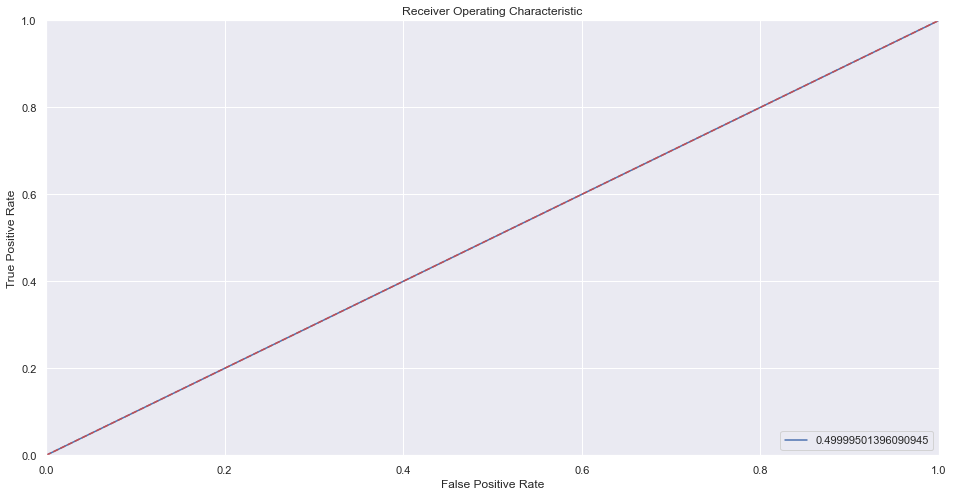

In [32]:
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

The ROC Curve above indicates the AUC value = 49.99%

## Naive Bayes - 1

In [33]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

Y_pred_NB= classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, Y_pred_NB))
print(confusion_matrix(Y_test, Y_pred_NB))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(Y_pred_NB,Y_test))

              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100280
           1       0.25      0.98      0.40     14053

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333

[[59387 40893]
 [  319 13734]]
accuracy is 0.639544138612649


#### From the Naive Bayes - 1 model:
1. Accuracy: 63.95% [Poor Model]
2. Precision: How many items selected are relevant?
    1. Class 0 = 99%
    2. Class 1 = 25%
3. Recall: How many relevant items were selected?
    1. Class 0 = 59%
    2. Class 1 = 98%
4. F1 Score: Is a measure of a model's accuracy on a dataset. Higher F1 = perfect precision and recall
    1. Class 0 = 74%
    2. Class 1 = 40%
    [Not a good F1 Score, therefore not a good fit model]
5. CFMatrix: Tabular representation of Actual v/s Predicted values
    1. TP = 59,387 || TN = 13,734
    2. FP = 40,893 || FN = 319

Conclusion: Not a good fit model, needs tuning.

## Decision Tree - 1

In [34]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, Y_train)

y_pred_DT = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(Y_test, y_pred_DT))
print(confusion_matrix(Y_test, y_pred_DT))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred_DT,Y_test))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90    100280
           1       0.29      0.31      0.30     14053

    accuracy                           0.82    114333
   macro avg       0.60      0.60      0.60    114333
weighted avg       0.83      0.82      0.82    114333

[[89623 10657]
 [ 9741  4312]]
accuracy is 0.8215913165927597


#### From the Decision Tree - 1 model:
1. Accuracy: 82.12%
2. Precision: How many items selected are relevant?
    1. Class 0 = 90%
    2. Class 1 = 29%
3. Recall: How many relevant items were selected?
    1. Class 0 = 89%
    2. Class 1 = 31%
4. F1 Score: Is a measure of a model's accuracy on a dataset. Higher F1 = perfect precision and recall
    1. Class 0 = 90%
    2. Class 1 = 30%
5. CFMatrix: Tabular representation of Actual v/s Predicted values
    1. TP = 89,609 || TN = 4,301
    2. FP = 10,671 || FN = 9,752

Conclusion: Good fit model, as Accuracy is >70% and F1 score for class 0 is 90%

## Logistic Regression - 2 (Tuning using Cross Validation)

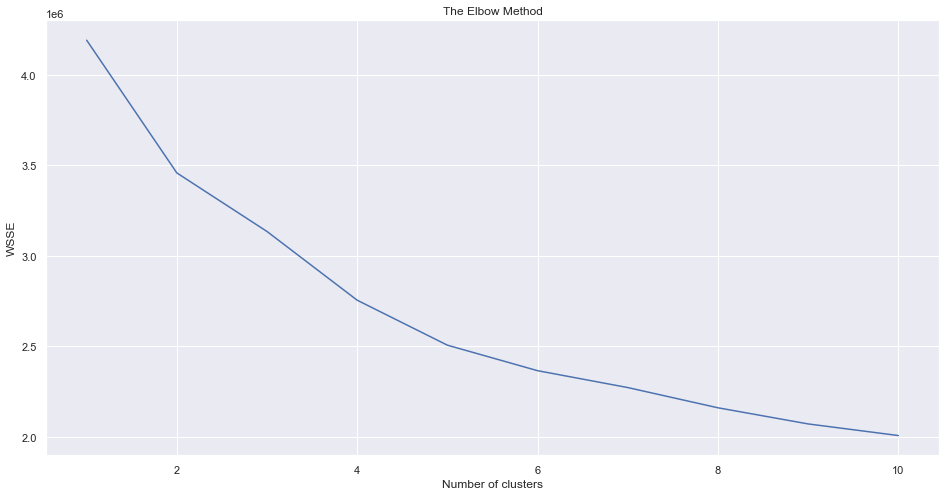

In [35]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wsse = [] #within the clusters some of squared errors & inertia calculates those errors
for i in range(1, 11): #11 is excluding
    kmeans = KMeans(n_clusters = i, random_state = 10) #random_state is equivalent to set.seed, but number should be same so that models are matched
    kmeans.fit(X)
    wsse.append(kmeans.inertia_) # append helps to add a single element at a time
plt.plot(range(1, 11), wsse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

From the above chart(elbow method) we can select 3 as number of clusters for kfold tuning method

In [36]:
#Using cross validation

classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=3)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

#_______________________________________________________

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred_1=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

KFold(n_splits=3, random_state=None, shuffle=False)
[0.87797719 0.87634523 0.87843689]
0.8775864380950443


Accuracy of the model using Logistic Regression - 2 is improved only by 0.05%

## Threshold Adjustment - Tuning method

In [37]:
#Store the predicted probbilities
Y_pred_prob = classifier.predict_proba(X_test)
#print(Y_pred_prob)
for a in np.arange(0,1,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
       cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 100280  , type 2 error : 0  , type 1 error: 100280
Errors at threshold  0.01 : 48107  , type 2 error : 43  , type 1 error: 48064
Errors at threshold  0.02 : 48095  , type 2 error : 43  , type 1 error: 48052
Errors at threshold  0.03 : 46462  , type 2 error : 97  , type 1 error: 46365
Errors at threshold  0.04 : 43271  , type 2 error : 242  , type 1 error: 43029
Errors at threshold  0.05 : 42092  , type 2 error : 280  , type 1 error: 41812
Errors at threshold  0.06 : 41350  , type 2 error : 307  , type 1 error: 41043
Errors at threshold  0.07 : 41312  , type 2 error : 309  , type 1 error: 41003
Errors at threshold  0.08 : 41288  , type 2 error : 311  , type 1 error: 40977
Errors at threshold  0.09 : 41268  , type 2 error : 313  , type 1 error: 40955
Errors at threshold  0.1 : 41240  , type 2 error : 313  , type 1 error: 40927
Errors at threshold  0.11 : 41218  , type 2 error : 317  , type 1 error: 40901
Errors at threshold  0.12 : 41212  , type 2 error : 319  

In [38]:
Y_pred_class = []
for value in Y_pred_prob[:,1]:
    if value > 0.56:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
#print(Y_pred_class)

## Creating a new Y_pred_class at Threshold 0.56 where Type1 error's and Type2 error's are minimum

In [39]:
#Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm= confusion_matrix (Y_test,Y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_class))

acc=accuracy_score(Y_test,Y_pred_class)
print("Accuracy of the model:",acc)

[[100280      0]
 [ 14053      0]]
Classification report: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93    100280
           1       0.00      0.00      0.00     14053

    accuracy                           0.88    114333
   macro avg       0.44      0.50      0.47    114333
weighted avg       0.77      0.88      0.82    114333

Accuracy of the model: 0.8770871052102193


Model performance after tuning it using Threshold adjustment remains same as Logistic Regression - 1

# PROJECT CONCLUSION
## Data information:
1. Total number of variables: 12
2. Total number of rows: 3,81,109
3. Train Test split: test_size = 0.3, random_state = 25

## Model/ Algorithm information:
1. Models and their performance (Ranking):
    1. Logistic Regression - 2 : 87.75% accuracy
    2. Logistic Regression - 1 : 87.70% accuracy
    3. Threshold adjustment model : 87.70% accuracy
    4. Decision Tree : 82.12% accuracy
    5. Naive Bayes : 63.95% accuracy
    
## Report to company:
1. Target audience age group: 21-27 years
2. Many customers are not interested in vehicle insurance
3. Almost more than 50% customers did not have a vehicle insurance in the past
4. Most of the vehicles that get insurance are of age 1-2 years
5. Males opt for vehicle insurance more than Females
6. Only a very few customers did not have a driving license with them
7. Nearly 50% of the vehicles have been damaged in the past
8. Majority of the customers buy vehicle insurance of premium between Rs. 3,000/- to 10,000/-

## Suggestions:
1. The target audience being between the age of 21-27 years (either students or newly employed), live on a limited budget, therefore the premium payable for such age group must be less either by introducing lower cost strategy or providing discount to such group
2. Most of the customers get insurance for their vehicle which is between 1-2 year old, and then dropping the idea of purchasing an insurance, to curb that problem: providing insurance policies for longer duration with limited/ less claim value can help the company attract new or their existing customers and push them to buying vehicle insurance
3. Although most of the vehicle insurance is purchased by Males, a majority of Females also buy vehicle insurance and that group of demographic must not be ignored, to increase value and enjoy customer retention and new customer acquisition - introducing special discounts/ previliges for females will improve business and company goodwill
4. Providing policy to non-driving license holders must be removed/ abolished completely as it may cause legal problems for the company in future
5. As majority of the revenue is generated by policies that cost between 3k to 10k, which indicates that the value of claim for such policies will be less, and majority buyers for such policies would be of the demographic age group of 20-30 years, indicating possible low income group (as compared to other age group's), efforts to retain such age group must continue in order for business revenue to churn regularly, however newer policies/ strategies must be introduced to attract the people of higher age group (between 30-38, where use of vehicle insurance is lesser), (between 38-50, where some more target customers can be identified)
6. Almost 50% of the customers are seen to have damaged their vehicles in past, this can* be bad business if the damages are not assessed properly, to curb this risk, higher premium should be charged in return of a relatively lower claim value

(* not always, therefore the company must revaluate such request before processing the insurance request)